## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

## Read dataset


In [ ]:
df=pd.read_csv('/content/iphone_purchase_records.csv')
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


## label

In [ ]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df.head()

,Gender,Age,Salary,Purchase Iphone
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


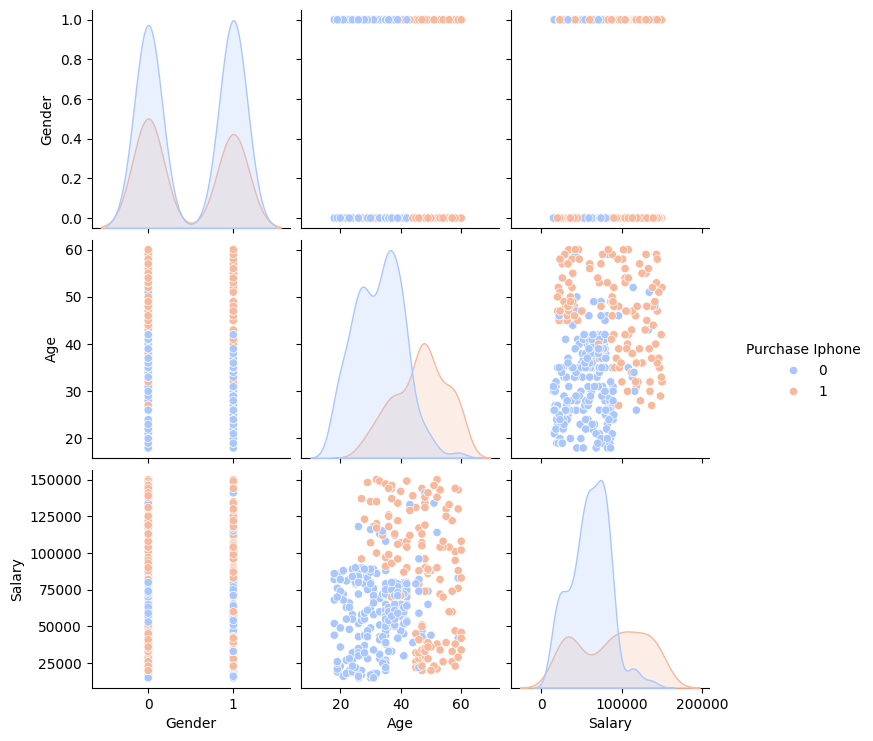

In [ ]:
sns.pairplot(df,hue='Purchase Iphone', palette='coolwarm')

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(df.drop('Purchase Iphone',axis=1))

StandardScaler()

In [ ]:
scaled_features=scaler.transform(df.drop('Purchase Iphone',axis=1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Purchase Iphone'],
                                                    test_size=0.30)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.8833333333333333

In [ ]:
error_rate=[]
for i in range (1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i=knn.predict(X_test)
  error_rate.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Error Rate')

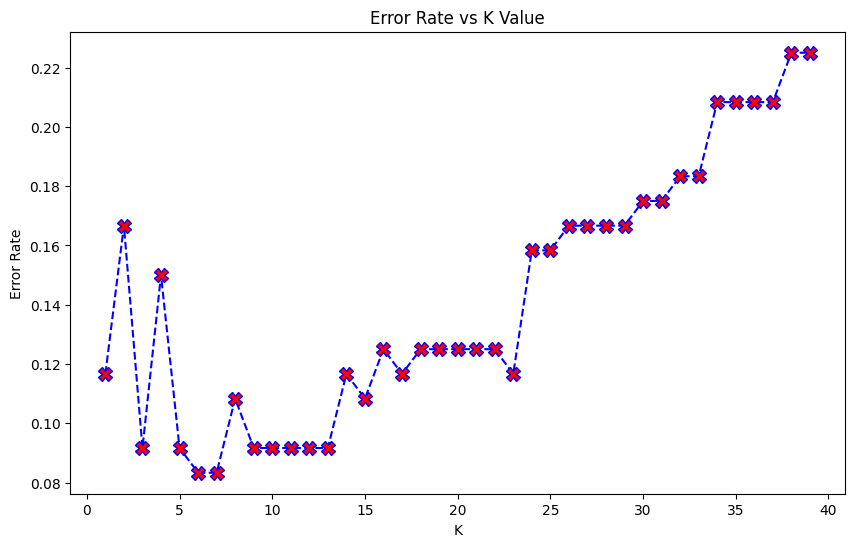

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='X',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[72  4]
 [ 6 38]]


              precision    recall  f1-score   support

           0       0.92      0.95      0.94        76
           1       0.90      0.86      0.88        44

    accuracy                           0.92       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120



In [ ]:
from sklearn.model_selection import cross_val_score

import numpy as np
K_values=range(1,18)
scores=[]
for k in K_values:
  model=KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train,y_train)
  scores.append(np.mean(scores))
best_k=K_values[np.argmax(scores)]
print(f'the best k value is {best_k}')

the best k value is 1


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


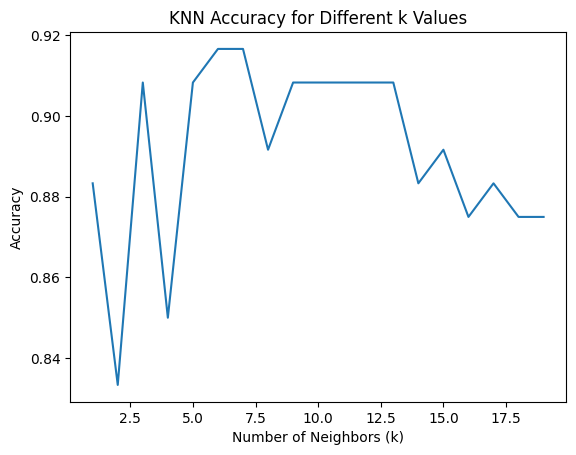

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

k_values = range(1, 20)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    accuracies.append(accuracy)

plt.plot(k_values, accuracies)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different k Values')
plt.show()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[72  4]
 [ 6 38]]


              precision    recall  f1-score   support

           0       0.92      0.95      0.94        76
           1       0.90      0.86      0.88        44

    accuracy                           0.92       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120

